<a href="https://colab.research.google.com/github/somilasthana/MachineLearningSkills/blob/master/Ensemble_Methods_Bagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
"""
The goal of ensemble methods is to combine the predictions of several best estimators
that generalizes / robustness 

Two types:
- Averaging Methods:
Build as many estimators independently and then average them. This reduces in variance

- Boosting Method
Base estimators are build sequentially, one tries to reduce the bias of combined estimator
"""

In [0]:
"""
Bagging meta-estimator:
Build several black-box estimators on random subset of data of training set and then aggregate.
It helps in reducing the variance of base estimator by introducing randomization into contruction procedure,
making ensemble out of it.
As they avoid overfitting, they best use strong and complex model which ensemble. ( Boosting usually works with weak models)
"""

In [0]:
"""
Bagging methods come with different types based on how random sets of training sets are drawn

1. Pasting : From an already drawn random dataset draw further random datasets
2. Bagging:  Samples drawn with replacement from training set
3. Random Subspaces: Random sets drawn from training set however, with random subset of features
4. Random Patches: Base estimator is build on both samples and feature
"""

In [0]:
# Using Bagging with KNN

from sklearn.ensemble import BaggingClassifier

from sklearn.neighbors import KNeighborsClassifier

bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
bagging

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=0.5,
                  max_samples=0.5, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [0]:
"""
Example illustrates : Bagging increases bias but reduces variance compared to single tree

bias-variance decomposition of the expected mean square error of a single estimator
can be decomposed as 
bias term
variance term
noise

bias term
- Avg amount by which the predictions of an estimator differs from the best estimator of the problem ( Bayes Model)

variance term
- Variability of the predictions of an estimator when it fit over different LS of the problem

noise
- The noise measures the irreducible part of the error which is due the variability in the data.

"""

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [0]:
# Settings
n_repeat = 50       # Number of iterations for computing expectations
n_train = 50        # Size of the training set
n_test = 1000       # Size of the test set
noise = 0.1         # Standard deviation of the noise
np.random.seed(42)

In [0]:
estimator = BaggingRegressor(DecisionTreeRegressor())

In [0]:
# Generate Fake Data

def f(x):
  x = x.ravel()
  
  return np.exp(-x ** 2) + 1.5 * np.exp(-(x-2) ** 2)

In [0]:
def generate(n_samples, noise, n_repeat = 1):
  X = np.random.rand(n_samples) * 10 - 5
  X = np.sort(X)
  
  if n_repeat == 1:
    y = f(X) + np.random.normal(0.0, noise, n_samples)
  else:
    y = np.zeros((n_samples, n_repeat))
    
    for i in range(n_repeat):
      y[:, i] = f(X) + np.random.normal(0.0, noise, n_samples)
      
  X = X.reshape((n_samples, 1))
  
  return X, y
    
  

In [0]:
X_train=[]
y_train=[]

In [0]:
for i in range(n_repeat):
  X, y = generate(n_samples=n_train, noise=noise)
  X_train.append(X)
  y_train.append(y)


In [0]:
X_test, y_test = generate(n_samples=n_test, noise=noise, n_repeat=n_repeat)


In [0]:
y_predict = np.zeros((n_test, n_repeat))

for i in range(n_repeat):
  estimator = estimator.fit(X_train[i], y_train[i])
  y_predict[:, i] = estimator.predict(X_test)

In [0]:
# Bias^2 + Variance + Noise decomposition of the mean squared error
y_error = np.zeros(n_test)

for i in range(n_repeat):
  for j in range(n_repeat):
    y_error += (y_test[:, j] - y_predict[:, i]) ** 2

In [0]:
y_error /= (n_repeat * n_repeat)

In [0]:
y_noise = np.var(y_test, axis=1)

In [0]:
y_bias = (f(X_test) - np.mean(y_predict, axis=1)) ** 2

In [0]:
y_var = np.var(y_predict, axis=1)

In [31]:
print("{0}: {1:.4f} (error) = {2:.4f} (bias^2) "
          " + {3:.4f} (var) + {4:.4f} (noise)".format("Bagging Tree",
                                                      np.mean(y_error),
                                                      np.mean(y_bias),
                                                      np.mean(y_var),
                                                      np.mean(y_noise)))


Bagging Tree: 0.0192 (error) = 0.0006 (bias^2)  + 0.0085 (var) + 0.0098 (noise)


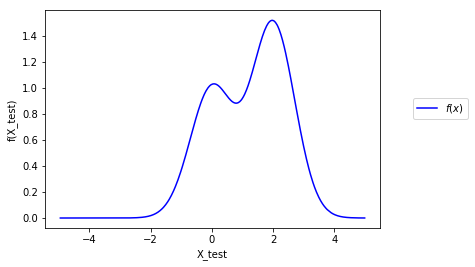

In [93]:
plt.plot(X_test, f(X_test), "b", label="$f(x)$")
plt.xlabel("X_test")
plt.ylabel("f(X_test)")
plt.legend(loc=(1.1, .5))

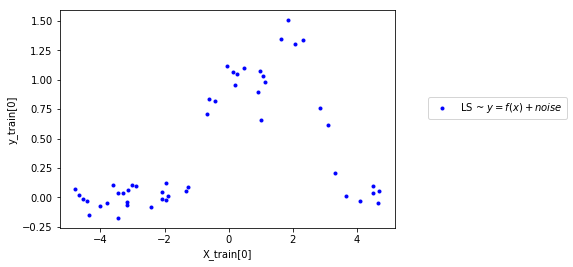

In [92]:
plt.plot(X_train[0], y_train[0], ".b", label="LS ~ $y = f(x)+noise$")
plt.xlabel("X_train[0]")
plt.ylabel("y_train[0]")
plt.legend(loc=(1.1, .5))

Text(0, 0.5, 'y_predict[i]')

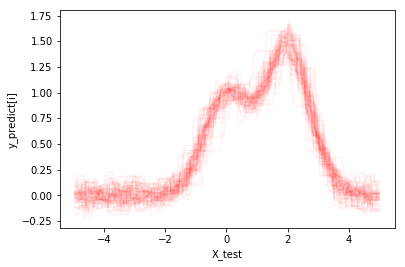

In [94]:
for i in range(n_repeat):
  plt.plot(X_test, y_predict[:, i], "r", alpha=0.05)
plt.xlabel("X_test")
plt.ylabel("y_predict[i]")


Text(0, 0.5, 'y_test[i]')

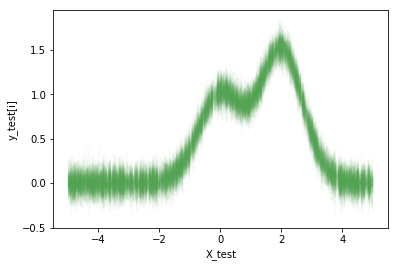

In [96]:
for i in range(n_repeat):
  plt.plot(X_test, y_test[:, i], "g", alpha=0.02)
plt.xlabel("X_test")
plt.ylabel("y_test[i]")


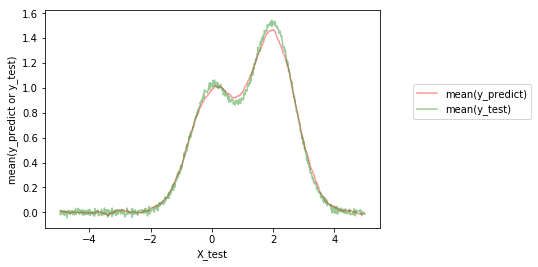

In [89]:
plt.plot(X_test, np.mean(y_predict, axis=1), "r", alpha=0.4, label="mean(y_predict)")
plt.plot(X_test, np.mean(y_test, axis=1), "g", alpha=0.4, label="mean(y_test)")
plt.xlabel("X_test")
plt.ylabel("mean(y_predict or y_test)")
plt.legend(loc=(1.1, .5))

In [62]:
y_predict[:, 10].shape, y_test[:, 10].shape

((1000,), (1000,))

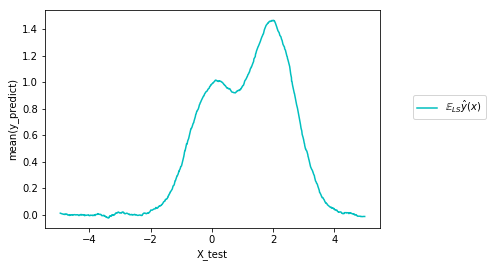

In [88]:
plt.plot(X_test, np.mean(y_predict, axis=1), "c",
             label=r"$\mathbb{E}_{LS} \^y(x)$")
plt.xlabel("X_test")
plt.ylabel("mean(y_predict)")
plt.legend(loc=(1.1, .5))

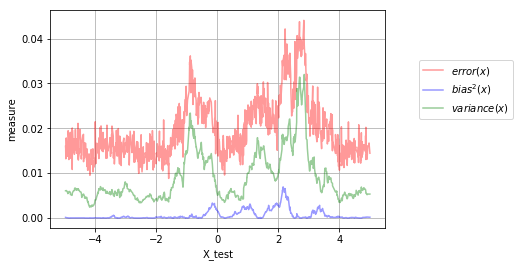

In [87]:
# Error Plot 

plt.plot(X_test, y_error, "r", label="$error(x)$", alpha=0.4)
plt.plot(X_test, y_bias, "b", label="$bias^2(x)$", alpha=0.4)
plt.plot(X_test, y_var, "g", label="$variance(x)$", alpha=0.4)
plt.grid()
plt.xlabel("X_test")
plt.ylabel("measure")
plt.legend(loc=(1.1, .5))

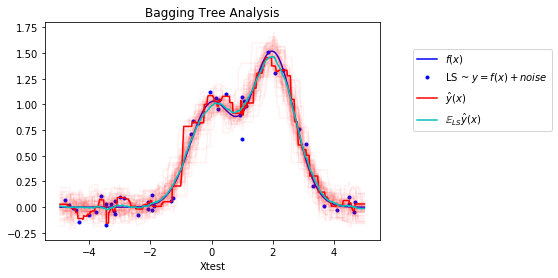

In [86]:
def plot_analysis(name):
    plt.plot(X_test, f(X_test), "b", label="$f(x)$")
    plt.plot(X_train[0], y_train[0], ".b", label="LS ~ $y = f(x)+noise$")

    for i in range(n_repeat):
        if i == 0:
            plt.plot(X_test, y_predict[:, i], "r", label=r"$\^y(x)$")
        else:
            plt.plot(X_test, y_predict[:, i], "r", alpha=0.05)

    plt.plot(X_test, np.mean(y_predict, axis=1), "c",
             label=r"$\mathbb{E}_{LS} \^y(x)$")

    #plt.xlim([-5, 5])
    plt.xlabel("Xtest")
    plt.title(name)
    plt.legend(loc=(1.1, .5))

    
plot_analysis("Bagging Tree Analysis")

In [0]:
"""
The predictions (in dark red) of a single Bagging tree trained over a random dataset LS (the blue dots) of a toy 1d regression problem. 
It also illustrates the predictions (in light red) of other Bagging decision trees trained over other (and different) randomly 
drawn instances LS of the problem. 

Intuitively, the variance term here corresponds to the width of the beam of predictions (in light red) of the individual estimators. 
The larger the variance, the more sensitive are the predictions for x to small changes in the training set. 

The bias term corresponds to the difference between the average prediction of the estimator (in cyan) and the best possible model 
(in dark blue). 

On this problem, we can thus observe that the bias is quite low (both the cyan and the blue curves are close to each other) 
while the variance is lare (the red beam is rather wide).
"""